# Visualizations

In [51]:
roster = pd.read_csv("Roster_Export_-_2022-0112_IST_718_Big_Data_Analytics.csv", sep = ',')
roster.head()

,FirstName,LastName,FullName,Shorthand,Glasses,ListeningDevice,Hat,FacialHair,HairColor,HairLength,ZoomBackground
0,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None
1,Christian,Bendillo,Christian Bendillo,christi,No,Headphones,No,Yes,Dark,Short,None
2,Joshua,Biggs-Bauer,Joshua Biggs-Bauer,joshuab,No,Ear buds,No,No,Dark,Short,Blurred
3,Lei,Cheng,Lei Cheng,leichen,Yes,Headphones,No,No,Dark,Short,None
4,Farahin,Choudhury,Farahin Choudhury,farahin,No,None,No,No,Dark,Long,None


In [32]:
# Create a function that creates a dataframe of count of selected attribute
# Required inputs:
#    df - dataframe name
#    attribute - string of column name

def attribute_count(df,attribute):
  count = df.groupby([attribute])
  count = count.size().to_frame(name='counts')
  count.index.name = attribute
  count.reset_index(inplace=True)
  return count

In [33]:
# Create dataframe summarizing glasses by count
glasses_count = attribute_count(roster,'Glasses')
glasses_count

,Glasses,counts
0,No,11
1,Yes,9


In [35]:
# Create dataframe summarizing listening device by count
listening_device_count = attribute_count(roster,'ListeningDevice')
listening_device_count

,ListeningDevice,counts
0,Ear buds,8
1,Headphones,4
2,None,8


In [36]:
# Create dataframe summarizing hat by count
hat_count = attribute_count(roster,'Hat')
hat_count

,Hat,counts
0,No,18
1,Yes,2


In [37]:
# Create dataframe summarizing facial hair by count
facial_hair_count = attribute_count(roster,'FacialHair')
facial_hair_count

,FacialHair,counts
0,No,16
1,Yes,4


In [38]:
# Create dataframe summarizing hair color by count
hair_color_count = attribute_count(roster,'HairColor')
hair_color_count

,HairColor,counts
0,Dark,12
1,Light,5
2,None,3


In [39]:
# Create dataframe summarizing hair length by count
hair_length_count = attribute_count(roster,'HairLength')
hair_length_count

,HairLength,counts
0,Bald,3
1,Long,4
2,Medium,1
3,Ponytail,1
4,Short,11


In [40]:
# Create dataframe summarizing zoom background by count
zoom_background_count = attribute_count(roster,'ZoomBackground')
zoom_background_count

,ZoomBackground,counts
0,Blurred,3
1,Image,2
2,None,15


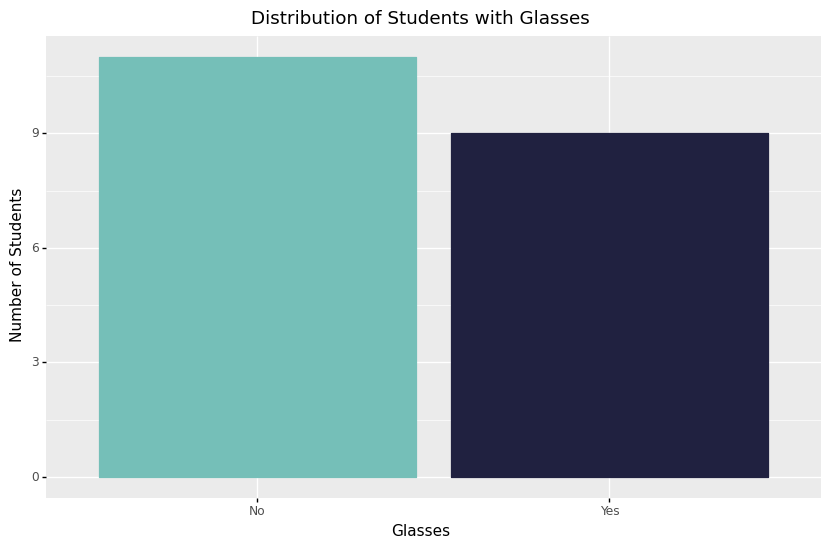

<ggplot: (8794709259174)>

In [41]:
# Visualization of students with/without glasses

# Creates Color Scales
color_scale = ['#75bfb8','#202140']

# Creates Bar Charts Primary Colors
glasses = (
    ggplot(glasses_count) 
    + aes(x = 'Glasses', y = 'counts',color='Glasses',fill='Glasses')
    + geom_bar(stat="identity")
    + labs(title="Distribution of Students with Glasses", x="Glasses", y = "Number of Students") # Change title and labels
    + theme(legend_position = "none") # Remove legend
    + scale_fill_manual(values=color_scale)
    + scale_color_manual(values=color_scale)
    + theme(figure_size=(10, 6))
    + scale_y_continuous()
)
glasses
#ggsave(glasses,'glasses.png')

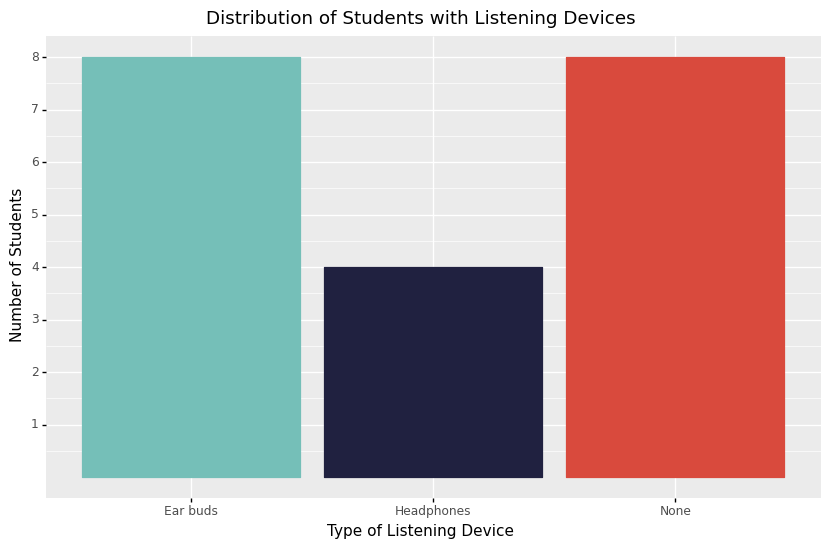

<ggplot: (8794709392044)>

In [42]:
# Visualization of students by listening devices

# Creates Color Scales
color_scale = ['#75bfb8','#202140','#d94a3d','#f2a74b']

# Creates Bar Charts Primary Colors
listening_device = (
    ggplot(listening_device_count) 
    + aes(x = 'ListeningDevice', y = 'counts',color='ListeningDevice',fill='ListeningDevice')
    + geom_bar(stat="identity")
    + labs(title="Distribution of Students with Listening Devices", x="Type of Listening Device", y = "Number of Students") # Change title and labels
    + theme(legend_position = "none") # Remove legend
    + scale_fill_manual(values=color_scale)
    + scale_color_manual(values=color_scale)
    + theme(figure_size=(10, 6))
    + scale_y_continuous(breaks=np.linspace(1,listening_device_count['counts'].max(),num=listening_device_count['counts'].max()))

)
listening_device
#ggsave(listening_device,'listening_device.png')

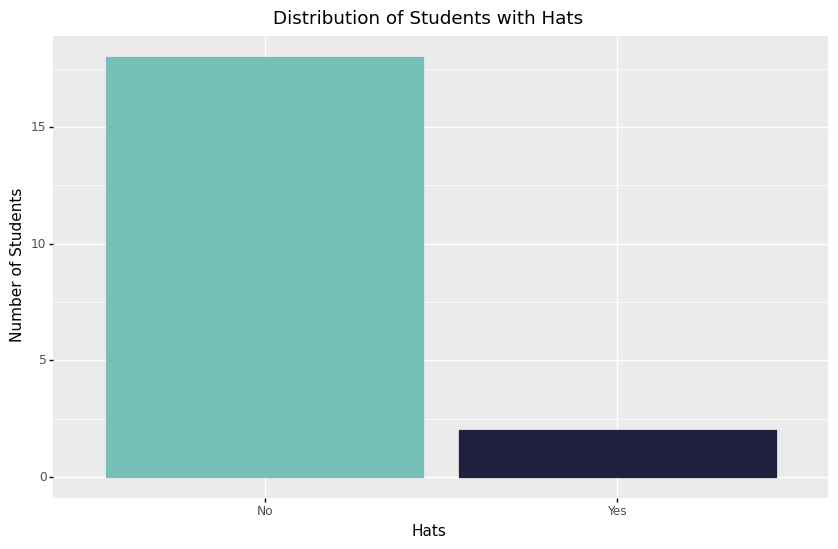

<ggplot: (8794709428661)>

In [43]:
# Visualization of students by hats

# Creates Color Scales
color_scale = ['#75bfb8','#202140']

# Creates Bar Charts Primary Colors
hat = (
    ggplot(hat_count) 
    + aes(x = 'Hat', y = 'counts',color='Hat',fill='Hat')
    + geom_bar(stat="identity")
    + labs(title="Distribution of Students with Hats", x="Hats", y = "Number of Students") # Change title and labels
    + theme(legend_position = "none") # Remove legend
    + scale_fill_manual(values=color_scale)
    + scale_color_manual(values=color_scale)
    + theme(figure_size=(10, 6))
)
hat
#ggsave(hat,'hat.png')

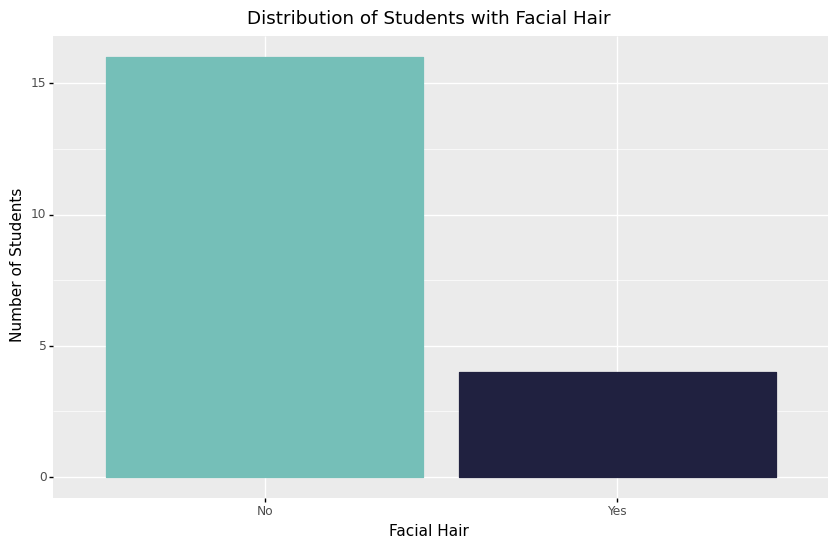

<ggplot: (8794709422523)>

In [44]:
# Visualization of students with facial hair

# Creates Color Scales
color_scale = ['#75bfb8','#202140']

# Creates Bar Charts Primary Colors
facial_hair = (
    ggplot(facial_hair_count) 
    + aes(x = 'FacialHair', y = 'counts',color='FacialHair',fill='FacialHair')
    + geom_bar(stat="identity")
    + labs(title="Distribution of Students with Facial Hair", x="Facial Hair", y = "Number of Students") # Change title and labels
    + theme(legend_position = "none") # Remove legend
    + scale_fill_manual(values=color_scale)
    + scale_color_manual(values=color_scale)
    + theme(figure_size=(10, 6))
)
facial_hair
#ggsave(facial_hair,'facial_hair.png')

In [62]:
# Modify column heading from correctName to Shorthand
models = models.rename(columns={'correctName': 'Shorthand'})

# Merge the model accuracy data with the roster data
master = roster.merge(models, how='inner', on='Shorthand')
master


,FirstName,LastName,FullName,Shorthand,Glasses,ListeningDevice,Hat,FacialHair,HairColor,HairLength,ZoomBackground,pctCorrect,Model
0,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,77.27,Random Forest
1,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,50.00,Bayes
2,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,77.27,kNN
3,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,100.00,CNN
4,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,76.14,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jiebin,Zhu,Jiebin Zhu,jiebinz,Yes,None,No,No,Dark,Short,Image,68.18,Random Forest
96,Jiebin,Zhu,Jiebin Zhu,jiebinz,Yes,None,No,No,Dark,Short,Image,40.91,Bayes
97,Jiebin,Zhu,Jiebin Zhu,jiebinz,Yes,None,No,No,Dark,Short,Image,72.73,kNN
98,Jiebin,Zhu,Jiebin Zhu,jiebinz,Yes,None,No,No,Dark,Short,Image,100.00,CNN


In [63]:
master2 = master[master['Model']!='Average']
master2

,FirstName,LastName,FullName,Shorthand,Glasses,ListeningDevice,Hat,FacialHair,HairColor,HairLength,ZoomBackground,pctCorrect,Model
0,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,77.27,Random Forest
1,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,50.00,Bayes
2,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,77.27,kNN
3,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,100.00,CNN
5,Christian,Bendillo,Christian Bendillo,christi,No,Headphones,No,Yes,Dark,Short,None,100.00,Random Forest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Nick,Waine,Nick Waine,nickwai,No,None,No,No,Dark,Short,None,100.00,CNN
95,Jiebin,Zhu,Jiebin Zhu,jiebinz,Yes,None,No,No,Dark,Short,Image,68.18,Random Forest
96,Jiebin,Zhu,Jiebin Zhu,jiebinz,Yes,None,No,No,Dark,Short,Image,40.91,Bayes
97,Jiebin,Zhu,Jiebin Zhu,jiebinz,Yes,None,No,No,Dark,Short,Image,72.73,kNN


In [69]:
pct_acc = master.groupby('Shorthand')['pctCorrect'].mean().reset_index()
pct_acc.head()

,Shorthand,pctCorrect
0,andrewd,85.226
1,annieti,72.728
2,christi,97.728
3,davidla,86.410
4,farahin,94.318


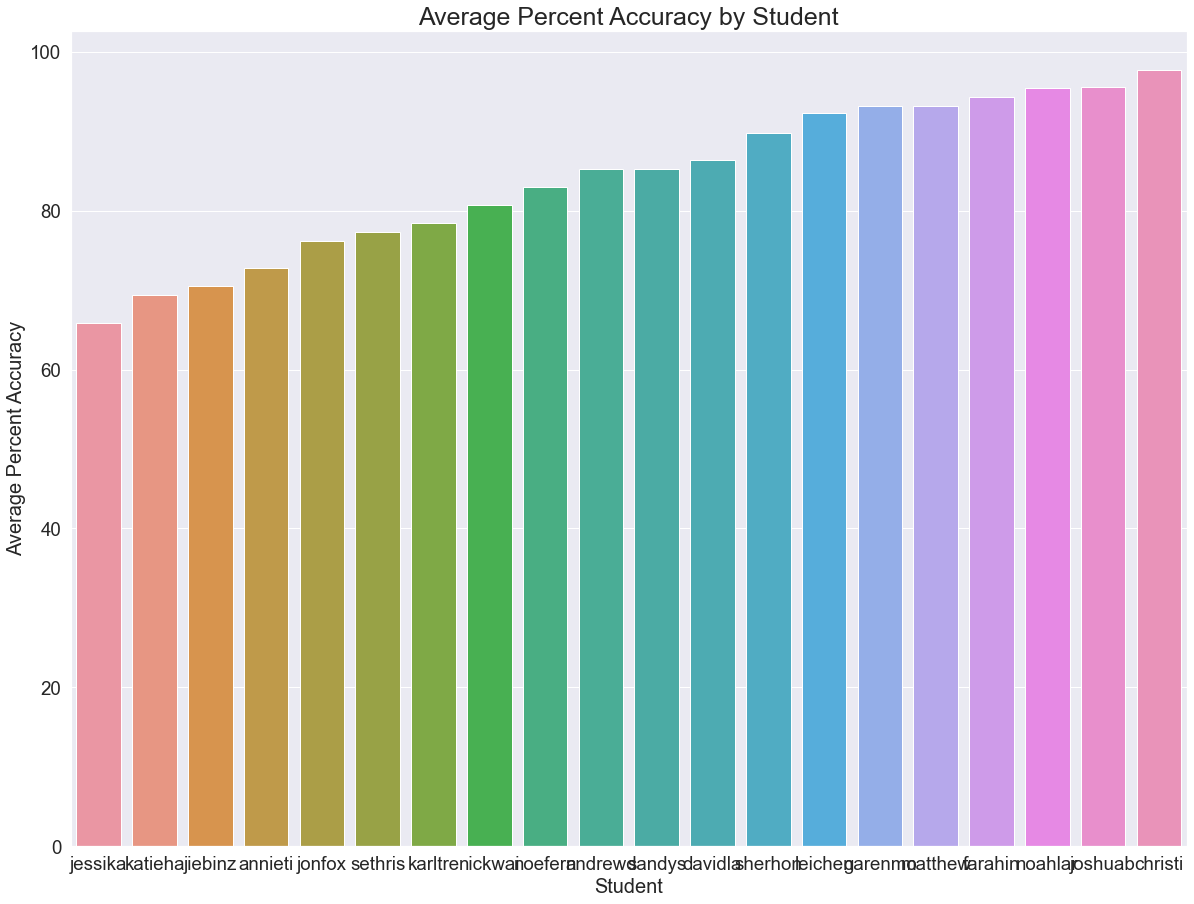

In [70]:
# Define figure
fig, ax = plt.subplots(1, figsize=(20, 15))

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Shorthand', y='pctCorrect', data=pct_acc,ci=None, order=pct_acc.sort_values('pctCorrect').Shorthand) 
plt.title('Average Percent Accuracy by Student',size=25)
plt.xlabel('Student',size=20)
plt.ylabel("Average Percent Accuracy",size=20)
sns.set(font_scale = 1)

In [71]:
master_avg = master[master['Model']=='Average']
master_avg

,FirstName,LastName,FullName,Shorthand,Glasses,ListeningDevice,Hat,FacialHair,HairColor,HairLength,ZoomBackground,pctCorrect,Model
4,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,76.14,Average
9,Christian,Bendillo,Christian Bendillo,christi,No,Headphones,No,Yes,Dark,Short,None,97.73,Average
14,Joshua,Biggs-Bauer,Joshua Biggs-Bauer,joshuab,No,Ear buds,No,No,Dark,Short,Blurred,95.50,Average
19,Lei,Cheng,Lei Cheng,leichen,Yes,Headphones,No,No,Dark,Short,None,92.23,Average
24,Farahin,Choudhury,Farahin Choudhury,farahin,No,None,No,No,Dark,Long,None,94.32,Average
29,Andrew,Dobkowski,Andrew Dobkowski,andrewd,No,None,Yes,Yes,Dark,Short,Blurred,85.23,Average
34,Noe,Fernandes,Noe Fernandes,noefern,Yes,None,No,No,Dark,Short,None,83.01,Average
39,Sherhone,Grant,Sherhone Grant,sherhon,No,None,No,No,Dark,Medium,None,89.77,Average
44,Katie,Haugh,Katie Haugh,katieha,Yes,None,No,No,Light,Long,None,69.42,Average
49,David,Ladd,David Ladd,davidla,Yes,None,No,No,None,Bald,Blurred,86.41,Average


In [72]:
# Look at demographics for top 5 accuracy
first = roster[roster['Shorthand']=='christi']
second = roster[roster['Shorthand']=='joshuab']
third = roster[roster['Shorthand']=='noahlar']
fourth = roster[roster['Shorthand']=='farahin']
fifth = roster[roster['Shorthand']=='matthew']

top2 = first.append(second,ignore_index = True)
top3 = top2.append(third,ignore_index=True)
top4 = top3.append(fourth,ignore_index=True)
top5 = top4.append(fifth,ignore_index=True)

# Merge pct accuracy
top5_merge = top5.merge(master_avg,how='inner')
top5_merge['Accuracy Flag'] = 'Top 5'
top5_merge.head()

,FirstName,LastName,FullName,Shorthand,Glasses,ListeningDevice,Hat,FacialHair,HairColor,HairLength,ZoomBackground,pctCorrect,Model,Accuracy Flag
0,Christian,Bendillo,Christian Bendillo,christi,No,Headphones,No,Yes,Dark,Short,None,97.73,Average,Top 5
1,Joshua,Biggs-Bauer,Joshua Biggs-Bauer,joshuab,No,Ear buds,No,No,Dark,Short,Blurred,95.50,Average,Top 5
2,Noah,Laraway,Noah Laraway,noahlar,No,Ear buds,No,No,Light,Short,None,95.45,Average,Top 5
3,Farahin,Choudhury,Farahin Choudhury,farahin,No,None,No,No,Dark,Long,None,94.32,Average,Top 5
4,Matthew,Laken,Matthew Laken,matthew,No,Headphones,No,Yes,Dark,Short,None,93.18,Average,Top 5


In [73]:
# Look at demographics for bottom 3 accuracy
last = roster[roster['Shorthand']=='jessika']
secondlast = roster[roster['Shorthand']=='katieha']
thirdlast = roster[roster['Shorthand']=='jiebinz']
fourthlast = roster[roster['Shorthand']=='annieti']
fifthlast = roster[roster['Shorthand']=='jonfox']

bottom2 = last.append(secondlast,ignore_index = True)
bottom3 = bottom2.append(thirdlast,ignore_index=True)
bottom4 = bottom3.append(fourthlast,ignore_index=True)
bottom5 = bottom4.append(fifthlast,ignore_index=True)

# Merge pct accuracy
bottom5_merge = bottom5.merge(pct_acc,how='inner')
bottom5_merge['Accuracy Flag'] = 'Bottom 5'
bottom5_merge.head()

,FirstName,LastName,FullName,Shorthand,Glasses,ListeningDevice,Hat,FacialHair,HairColor,HairLength,ZoomBackground,pctCorrect,Accuracy Flag
0,Jessika,Pietryka,Jessika Pietryka,jessika,Yes,Ear buds,No,No,Light,Ponytail,None,65.910,Bottom 5
1,Katie,Haugh,Katie Haugh,katieha,Yes,None,No,No,Light,Long,None,69.416,Bottom 5
2,Jiebin,Zhu,Jiebin Zhu,jiebinz,Yes,None,No,No,Dark,Short,Image,70.456,Bottom 5
3,Annie,Titus,Annie Titus,annieti,Yes,Ear buds,No,No,Dark,Long,Image,72.728,Bottom 5
4,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,76.136,Bottom 5


In [74]:
# Merge top 5 and bottom 5
top_and_bottom = top5_merge.append(bottom5_merge)
top_and_bottom

,FirstName,LastName,FullName,Shorthand,Glasses,ListeningDevice,Hat,FacialHair,HairColor,HairLength,ZoomBackground,pctCorrect,Model,Accuracy Flag
0,Christian,Bendillo,Christian Bendillo,christi,No,Headphones,No,Yes,Dark,Short,None,97.730,Average,Top 5
1,Joshua,Biggs-Bauer,Joshua Biggs-Bauer,joshuab,No,Ear buds,No,No,Dark,Short,Blurred,95.500,Average,Top 5
2,Noah,Laraway,Noah Laraway,noahlar,No,Ear buds,No,No,Light,Short,None,95.450,Average,Top 5
3,Farahin,Choudhury,Farahin Choudhury,farahin,No,None,No,No,Dark,Long,None,94.320,Average,Top 5
4,Matthew,Laken,Matthew Laken,matthew,No,Headphones,No,Yes,Dark,Short,None,93.180,Average,Top 5
0,Jessika,Pietryka,Jessika Pietryka,jessika,Yes,Ear buds,No,No,Light,Ponytail,None,65.910,NaN,Bottom 5
1,Katie,Haugh,Katie Haugh,katieha,Yes,None,No,No,Light,Long,None,69.416,NaN,Bottom 5
2,Jiebin,Zhu,Jiebin Zhu,jiebinz,Yes,None,No,No,Dark,Short,Image,70.456,NaN,Bottom 5
3,Annie,Titus,Annie Titus,annieti,Yes,Ear buds,No,No,Dark,Long,Image,72.728,NaN,Bottom 5
4,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,76.136,NaN,Bottom 5


/opt/anaconda3/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


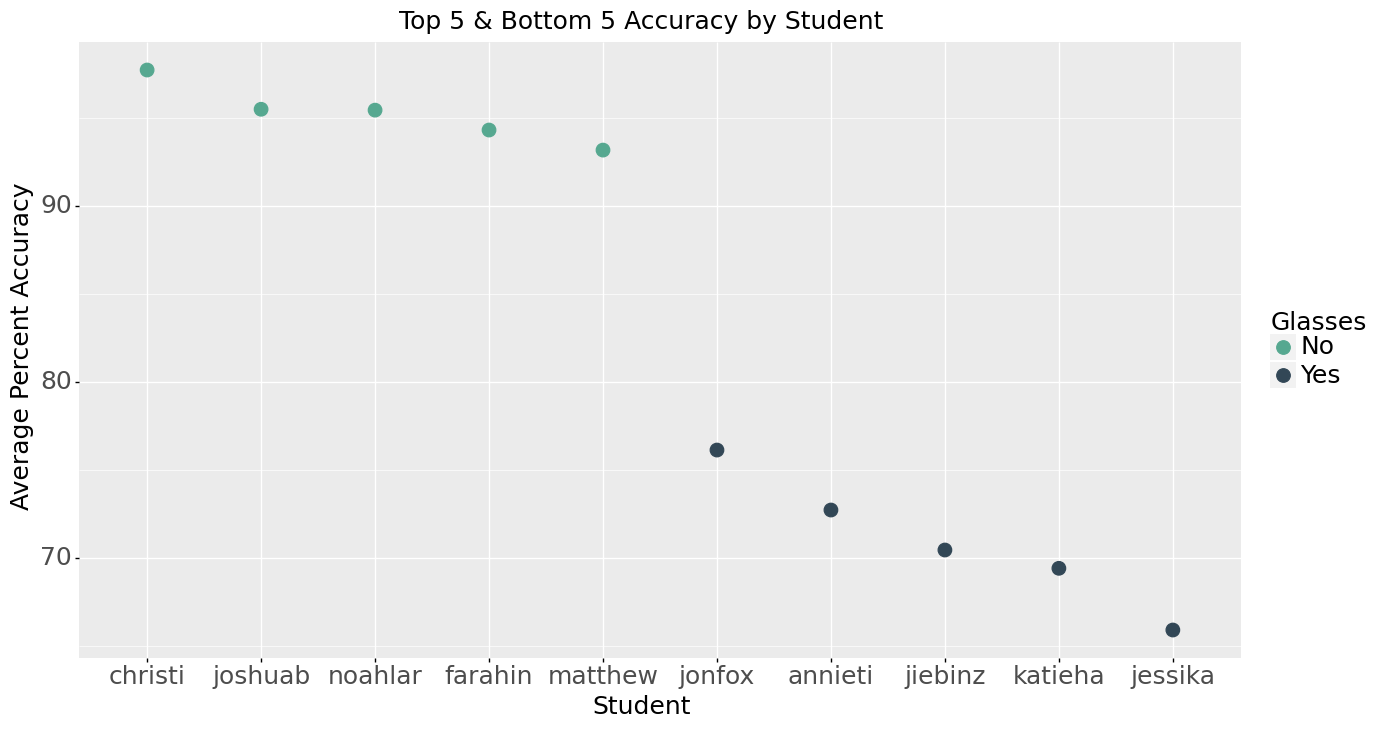

<ggplot: (8794709093072)>

In [86]:
# Create a plot that shows the top 5 accuracy and glasses

# Creates Color Scales
color_scale = ['#56A890','#324756']

(ggplot(top_and_bottom)
 + aes(x='reorder(Shorthand, -pctCorrect)', y='pctCorrect', color='Glasses')
 + geom_point(size=5)
 + labs(title='Top 5 & Bottom 5 Accuracy by Student', x='Student', y='Average Percent Accuracy')
  + scale_fill_manual(values=color_scale)
  + scale_color_manual(values=color_scale)
  + theme(figure_size=(15,8),text=element_text(size=18))
)

In [78]:
# Group by hair length accuracy
hair_length_acc = master_avg.groupby('HairLength')['pctCorrect'].mean().reset_index()
hair_length_acc.head()

,HairLength,pctCorrect
0,Bald,86.000
1,Long,80.425
2,Medium,89.770
3,Ponytail,65.910
4,Short,86.080


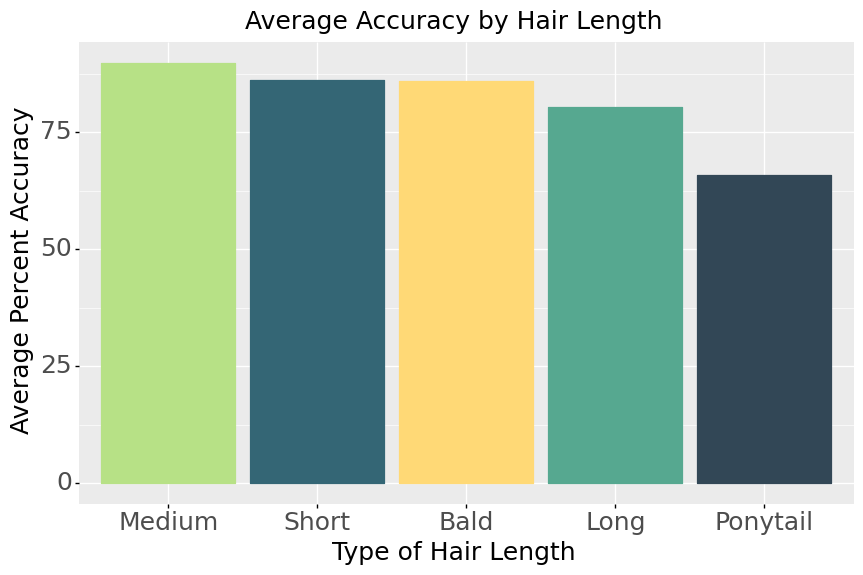

<ggplot: (8794708652960)>

In [87]:
# Visualization of average accuracy by hair length
from plotnine import *
# Creates Color Scales
color_scale = ['#FFD976','#56A890','#B7E186','#324756','#346675']

# Creates Bar Charts Primary Colors
hair_length_accuracy = (
    ggplot(hair_length_acc) 
    + aes(x = 'reorder(HairLength, -pctCorrect)', y = 'pctCorrect',color='HairLength',fill='HairLength')
    + geom_bar(stat="identity")
    + labs(title="Average Accuracy by Hair Length", x="Type of Hair Length", y = "Average Percent Accuracy") # Change title and labels
    + theme(legend_position = "none") # Remove legend
    + scale_fill_manual(values=color_scale)
    + scale_color_manual(values=color_scale)
    + theme(figure_size=(10, 6), text=element_text(size=18))
    + scale_y_continuous())

hair_length_accuracy
#ggsave(hair_length,'hair_length.png')

In [89]:
# Group by glasses accuracy
glasses_acc = master_avg.groupby('Glasses')['pctCorrect'].mean().reset_index()
glasses_acc.head()

,Glasses,pctCorrect
0,No,89.880000
1,Yes,77.064444


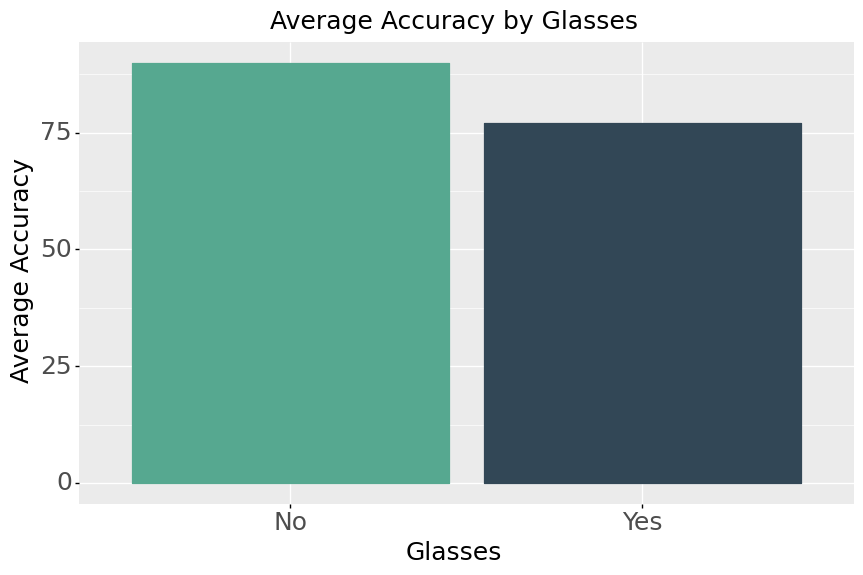

<ggplot: (8794708815776)>

In [90]:
# Visualization of accuracy for students with/without glasses

# Creates Color Scales
color_scale = ['#56A890','#324756']

# Creates Bar Charts Primary Colors
glasses_acc = (
    ggplot(glasses_acc) 
    + aes(x = 'reorder(Glasses, -pctCorrect)', y = 'pctCorrect',color='Glasses',fill='Glasses')
    + geom_bar(stat="identity")
    + labs(title="Average Accuracy by Glasses", x="Glasses", y = "Average Accuracy") # Change title and labels
    + theme(legend_position = "none") # Remove legend
    + scale_fill_manual(values=color_scale)
    + scale_color_manual(values=color_scale)
    + theme(figure_size=(10, 6), text=element_text(size=18))
    + scale_y_continuous()
)
glasses_acc
#ggsave(glasses,'glasses.png')

In [91]:
# Group by hat accuracy
hat_acc = master_avg.groupby('Hat')['pctCorrect'].mean().reset_index()
hat_acc.head()

,Hat,pctCorrect
0,No,84.367778
1,Yes,81.820000


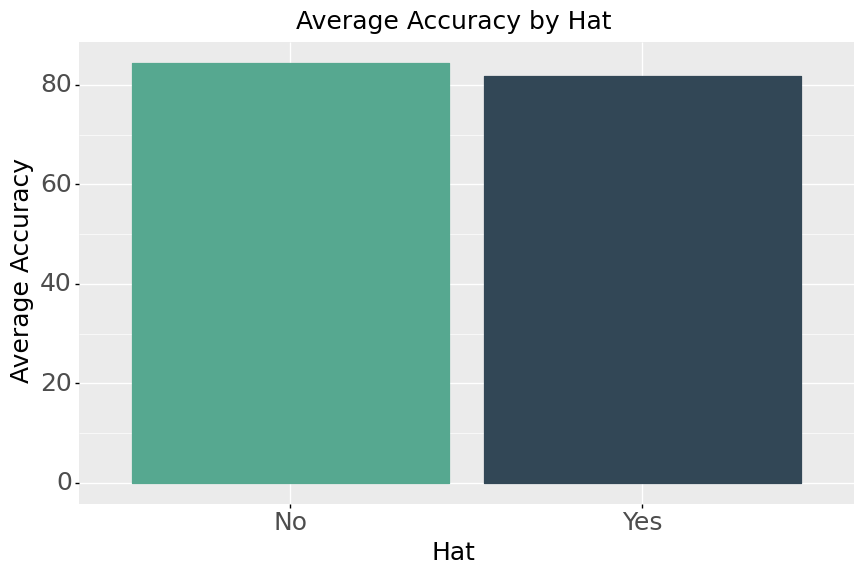

<ggplot: (8794709407507)>

In [93]:
# Visualization of accuracy for students with/without glasses

# Creates Color Scales
color_scale = ['#56A890','#324756']

# Creates Bar Charts Primary Colors
hat_accuracy = (
    ggplot(hat_acc) 
    + aes(x = 'reorder(Hat, -pctCorrect)', y = 'pctCorrect',color='Hat',fill='Hat')
    + geom_bar(stat="identity")
    + labs(title="Average Accuracy by Hat", x="Hat", y = "Average Accuracy") # Change title and labels
    + theme(legend_position = "none") # Remove legend
    + scale_fill_manual(values=color_scale)
    + scale_color_manual(values=color_scale)
    + theme(figure_size=(10, 6), text=element_text(size=18))
    #+ scale_y_continuous()
)
hat_accuracy
#ggsave(glasses,'glasses.png')